In [1]:
import json
from datetime import datetime
from pathlib import Path

import numpy as np

from trial import Trial, load_trials
from utils import SetUpstreamSteererAtStep


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
trial_index = 33

trials = load_trials(Path("trials.yaml"))

comment = f"trial_{trial_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = trials[trial_index].target_beam[0]
target_sigma_x = trials[trial_index].target_beam[1]
target_mu_y = trials[trial_index].target_beam[2]
target_sigma_y = trials[trial_index].target_beam[3]
target_mu_x_threshold = 3.3198e-9
target_mu_y_threshold = 3.3198e-9
target_sigma_x_threshold = 3.3198e-9
target_sigma_y_threshold = 3.3198e-9


In [4]:
from backend import EADOOCSBackend
from environment import EATransverseTuning

env = EATransverseTuning(
    backend=EADOOCSBackend(), magnet_init_mode="constant", magnet_init_values=np.zeros(5)
)
env.reset()


initializing ocelot...


{'beam': array([-0.00090631,  0.00042572, -0.00176666,  0.00063173], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.8285231e-03,  8.1280665e-14, -2.8285231e-03,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00116691,  0.00174513, -0.0008561 ,  0.00167419], dtype=float32)}

76it [11:32,  9.12s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2023-02-02 13:32:12.493145\nTime taken: 0:11:32.989734\nNo. of steps: 76\n\nBeam before:\n    mu_x    = -0.9063 mm\n    sigma_x =  0.4229 mm\n    mu_y    = -1.7642 mm\n    sigma_y =  0.6338 mm\n\nBeam after:\n    mu_x    = -1.1221 mm\n    sigma_x =  0.2312 mm\n    mu_y    = -2.0701 mm\n    sigma_y =  0.3740 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0237 mm\n    |delta_sigma_x| =  0.0033 mm\n    |delta_mu_y|    =  0.1568 mm\n    |delta_sigma_y| =  0.1773 mm\n\n    MAE =  0.0903 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   7.9651 1/m^2\n    AREAMQZM2 strength =  -8.9923 1/m^2\n    AREAMCVM1 kick     =  -0.

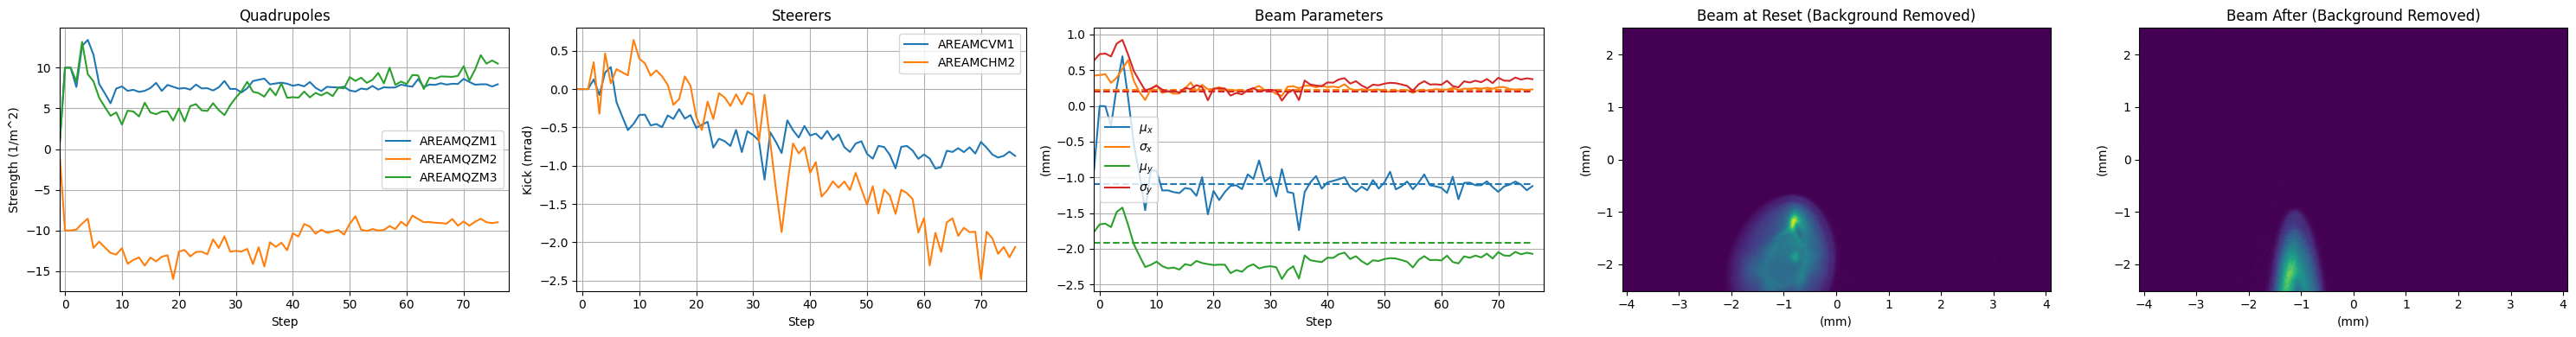

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=75,
    model_name="Bayesian Optimisation",
    logbook=True,
    # data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [6]:
from backend import EADOOCSBackend
from environment import EATransverseTuning

env = EATransverseTuning(
    backend=EADOOCSBackend(), magnet_init_mode="constant", magnet_init_values=np.zeros(5)
)
env.reset()


{'beam': array([-0.00093784,  0.00041586, -0.00177278,  0.00062653], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([ 0.00160491,  0.00066817, -0.00185473,  0.00126033], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)
  warnings.warn(
100%|██████████| 50/50 [07:55<00:00,  9.51s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-02-02 13:44:48.083357\nTime taken: 0:07:55.293664\nNo. of steps: 50\n\nBeam before:\n    mu_x    = -0.9329 mm\n    sigma_x =  0.4116 mm\n    mu_y    = -1.7789 mm\n    sigma_y =  0.6213 mm\n\nBeam after:\n    mu_x    = -1.0839 mm\n    sigma_x =  0.2495 mm\n    mu_y    = -1.9208 mm\n    sigma_y =  0.1974 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0145 mm\n    |delta_sigma_x| =  0.0216 mm\n    |delta_mu_y|    =  0.0075 mm\n    |delta_sigma_y| =  0.0007 mm\n\n    MAE =  0.0111 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.3560 1/m^2\n    AREAMQZM2 strength = -15.5163 1/m^2\n    AREAMCVM1 kick     

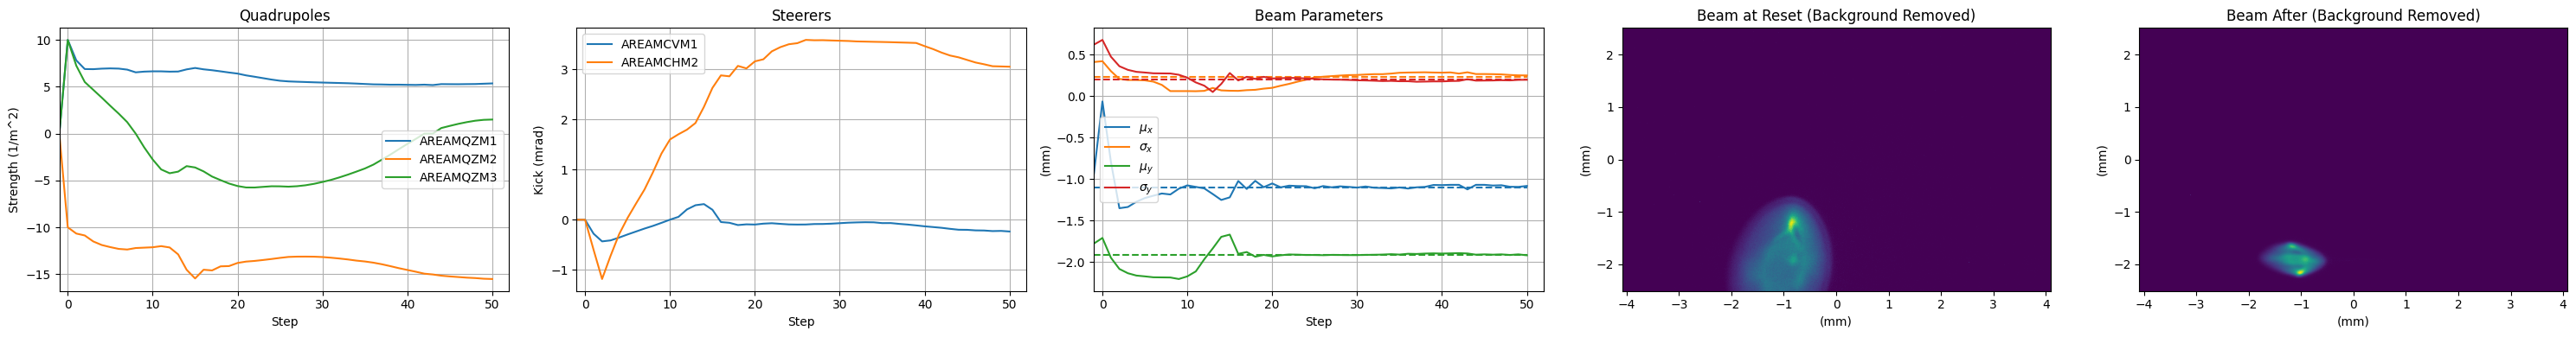

In [7]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=50,
    model_name="polished-donkey-996",
    logbook=True,
    # data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [8]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [9]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [10]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [11]:
# Reinforcement Learning with BO takeover
# from ea_rlbo import optimize_donkey_bo_combo

# bo_takeover = 0.00015

# optimize_donkey_bo_combo(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=50,
#     model_name="polished-donkey-996",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/rl_bo_takeover_{bo_takeover}/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     rl_steps=10,
#     bo_takeover=bo_takeover,
#     beta=0.01,
#     stepsize=0.05,
# )
